In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import chaospy as cp
from sklearn.utils.extmath import cartesian
import matplotlib.pyplot as plt

# TO-DO: Grid-Overview with 9 different quadrature rules

In [4]:
cp.quadrature.INTEGRATION_COLLECTION

{'clenshaw_curtis': <function chaospy.quadrature.clenshaw_curtis.clenshaw_curtis(order, domain=(0.0, 1.0), growth=False, segments=1)>,
 'discrete': <function chaospy.quadrature.discrete.discrete(order, domain=(0, 1), growth=False)>,
 'fejer_1': <function chaospy.quadrature.fejer_1.fejer_1(order, domain=(0, 1), growth=False, segments=1)>,
 'fejer_2': <function chaospy.quadrature.fejer_2.fejer_2(order, domain=(0, 1), growth=False, segments=1)>,
 'gaussian': <function chaospy.quadrature.gaussian.gaussian(order, dist, recurrence_algorithm='stieltjes', rule='clenshaw_curtis', tolerance=1e-10, scaling=3, n_max=5000)>,
 'genz_keister_16': <function chaospy.quadrature.genz_keister.genz_keister_16(order, dist=None)>,
 'genz_keister_18': <function chaospy.quadrature.genz_keister.genz_keister_18(order, dist=None)>,
 'genz_keister_22': <function chaospy.quadrature.genz_keister.genz_keister_22(order, dist=None)>,
 'genz_keister_24': <function chaospy.quadrature.genz_keister.genz_keister_24(order, d

## Vanilla Smolyak-Grid

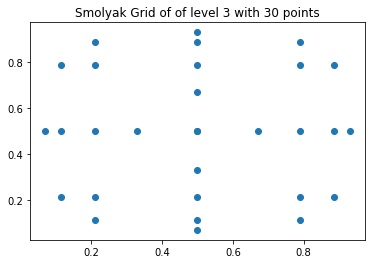

In [97]:
dist = cp.J(cp.Uniform(0,1), cp.Uniform(0,1))
level = 3
abscissas, weights = cp.quadrature.sparse_grid(level, dist)
x, y  = abscissas
plt.scatter(x,y)
plt.title(f"Smolyak Grid of of level {level} with {x.shape[0]} points")
plt.show()

## Numerisches Beispiel

$$f(x,y) = exp(x) \cdot exp(y) $$
$$\int_{[0,1]^2} f(x,y) dxdy = \int_{[0,1]} (e-1) \cdot exp(y)dy = (e-1)^2$$

In [74]:
exp2d = lambda x, y: np.exp(x**2+y**2)
real_res = (np.e-1)**2
quad_res = exp2d(x,y).dot(weights)
print(f"Log10-Fehler: {np.log10(np.abs(real_res-quad_res)):.2f}")

Log10-Fehler: -0.09


## Clenshaw-Curtis Grid

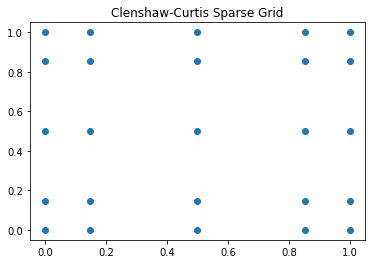

In [61]:
abscissas, weights = cp.quadrature.clenshaw_curtis(4, dist)
x, y  = abscissas
plt.scatter(x,y)
plt.title("Clenshaw-Curtis Sparse Grid")
plt.show()

In [62]:
real_res = (np.e-1)**2
quad_res = exp2d(x,y).dot(weights)
print(f"Log10-Fehler: {np.log10(np.abs(real_res-quad_res)):.2f}")

Log10-Fehler: -5.93


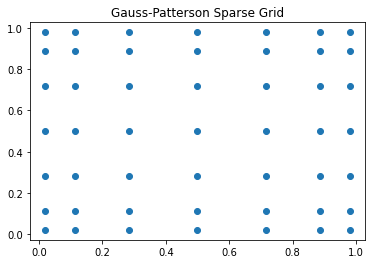

In [70]:
abscissas, weights = cp.quadrature.patterson(2, dist)
x, y  = abscissas
plt.scatter(x,y)
plt.title("Gauss-Patterson Sparse Grid")
plt.show()

In [69]:
real_res = (np.e-1)**2
quad_res = exp2d(x,y).dot(weights)
print(f"Log10-Fehler: {np.log10(np.abs(real_res-quad_res)):.2f}")

Log10-Fehler: -5.55


## Sparse Grid Übersicht 

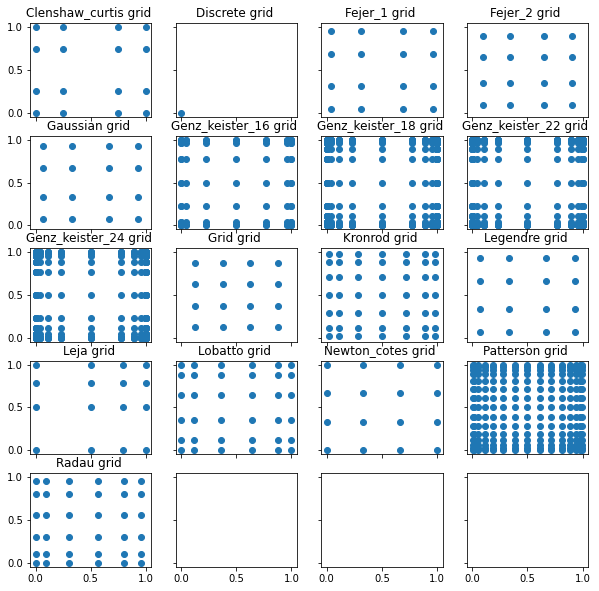

In [104]:
abscissas, weights = cp.quadrature.patterson(2, dist)
level = 3
fig, axes = plt.subplots(nrows=5, ncols=4,sharex=True, sharey=True, figsize=(10,10))
axes = np.ravel(axes)
int_methods = cp.quadrature.INTEGRATION_COLLECTION
for i, int_method in enumerate(int_methods.keys()):

    abscissas, weights = int_methods[int_method](level, dist)
    x, y  = abscissas
    axes[i].scatter(x,y)
    axes[i].set_title(
        f"{int_method.capitalize()} grid ")
plt.show()

## 3d sparse grid

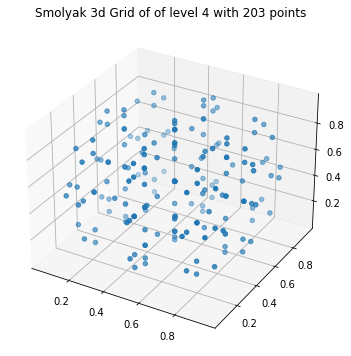

In [78]:
dist = cp.J(cp.Uniform(0,1), cp.Uniform(0,1), cp.Uniform(0,1))
level = 4

abscissas, weights = cp.quadrature.sparse_grid(level, dist)
x, y, z  = abscissas

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y, z)
ax.set_title(f"Smolyak 3d Grid of of level {level} with {x.shape[0]} points")
plt.show()

## Numerisches Beispiel: Quadratur in d=3

$$f(x,y) = exp(x) \cdot exp(y) + exp(z) $$
$$\int_{[0,1]^2} f(x,y) dxdydz = \int_{[0,1]} (e-1) \cdot exp(y) + \cdot exp(z)dydz = (e-1)^2 + e -1$$

In [79]:
exp3d = lambda x,y,z: np.exp(x)*np.exp(y) + np.exp(z)
real_res = (np.e-1)**2 + np.e -1 
quad_res = exp3d(x,y,z).dot(weights)
print(f"Log10-Fehler: {np.log10(np.abs(real_res-quad_res)):.2f}")

Log10-Fehler: -9.12


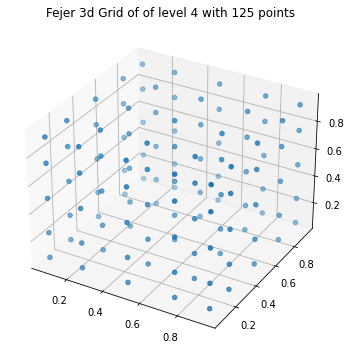

In [82]:
dist = cp.J(cp.Uniform(0,1), cp.Uniform(0,1), cp.Uniform(0,1))
level = 4

abscissas, weights = cp.quadrature.fejer_2(level, dist)
x, y, z  = abscissas

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y, z)
ax.set_title(f"Fejer 3d Grid of of level {level} with {x.shape[0]} points")
plt.show()